In [1]:
import _init_paths
import os, sys, cv2
import os.path as osp
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy.random as npr

from Config import Config
from datasets.Pascal import Pascal
from datasets.CIFAR10 import CIFAR10
from datasets.IMGenerator import IMGenerator
from nets.VGG16 import VGG16

In [2]:
model_pn = "../outputs/cifar10/train_VGG16/VGG16_SSDH_iter_8000.ckpt"

In [3]:
# setup & load configs
_C = Config(config_pn="../config/config.ini")
cfg = _C.cfg

In [4]:
ds_name = "cifar10"

In [5]:
dataset_DIR = osp.join(cfg.MAIN_DIR_ROOT, "data", ds_name)
dataset = CIFAR10(name=ds_name, path_dir=dataset_DIR, cfg=cfg)
dataset.load_sets()
print ('[INFO] dataset.name: {}'.format(dataset.name))
print ('[INFO] dataset.num_cls: {}'.format(dataset.num_cls))
print ('[INFO] dataset.train: {}'.format(dataset.sets["train"]["num_items"]))
print ('[INFO] dataset.trainval: {}'.format(dataset.sets["trainval"]["num_items"]))
print ('[INFO] dataset.test: {}'.format(dataset.sets["test"]["num_items"]))
print ('[INFO] dataset.val: {}'.format(dataset.sets["val"]["num_items"]))

[INFO] dataset.name: cifar10
[INFO] dataset.num_cls: 10
[INFO] dataset.train: 50000
[INFO] dataset.trainval: 0
[INFO] dataset.test: 0
[INFO] dataset.val: 10000


In [6]:
(train_images, val_images), _ = dataset.load_images()
print ('[INFO] train_images.num: {}'.format(len(train_images)))
print ('[INFO] val_images.num: {}'.format(len(val_images)))

[INFO] images_obj loaded from /home/rfm/eclipse/python/region-dh/cache/cifar10_images.pkl
[INFO] train_images.num: 50000
[INFO] val_images.num: 10000


In [7]:
tfconfig = tf.ConfigProto(allow_soft_placement=True)
tfconfig.gpu_options.allow_growth=True
# init session
sess = tf.Session(config=tfconfig)

In [8]:
cfg.TRAIN_BATCH_CFC_NUM_IMG = 1
net = VGG16(cfg)
net.create_architecture('TEST', dataset.num_cls, tag='default')

{'cls_score': <tf.Tensor 'vgg_16_2/Reshape:0' shape=(1, ?) dtype=float32>,
 'cls_pred': <tf.Tensor 'vgg_16_2/Reshape_1:0' shape=(1,) dtype=int64>,
 'cls_prob': <tf.Tensor 'vgg_16_2/cls_prob:0' shape=(1, ?) dtype=float32>}

In [9]:
print(('Loading model check point from {:s}').format(model_pn))
saver = tf.train.Saver()
saver.restore(sess, model_pn)
print('Loaded.')

Loading model check point from ../outputs/cifar10/train_VGG16/VGG16_SSDH_iter_8000.ckpt
INFO:tensorflow:Restoring parameters from ../outputs/cifar10/train_VGG16/VGG16_SSDH_iter_8000.ckpt
Loaded.


In [14]:
def im_classify(sess, net, image, data_gen):
    random_scale_inds = npr.randint(0, high=len(cfg.TRAIN_DEFAULT_SCALES),size=1)
    
    im_blob, im_scales = data_gen.built_image_blob([image], random_scale_inds)
    label_blob = data_gen.built_label_blob([image])
    
    cls_score, cls_prob, cls_pred = net.test_image(sess, im_blob, label_blob)
    
    return cls_score, cls_prob, cls_pred

In [11]:
val_gen = IMGenerator(val_images, dataset, cfg)

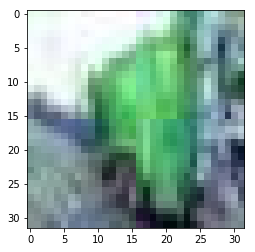

In [39]:
# visualize image
np.random.shuffle(val_images)
image = val_images[0]
im_RAW = cv2.imread(image.pathname)    
plt.imshow(im_RAW)

In [40]:
# classify one image
cls_score, cls_prob, cls_pred = im_classify(sess, net, image, val_gen)
print("image: {}, cls_prob: {:.3f}, cls_pred: {}, cls_tgt: {}".format(image.filename,
                                                                     np.max(cls_prob),
                                                                     cls_pred[0],
                                                                     image.label))

image: 3570.jpg, cls_prob: 1.000, cls_pred: 9, cls_tgt: 9


In [24]:
np.max(cls_prob)

0.9999908

In [19]:
image.label

'9'

In [10]:
test = np.random.randn(100)
batch = 23

In [13]:
for i in range(0,100, batch):
    pool = test[i:i+batch]
    print("pool.size: ", len(pool))

pool.size:  23
pool.size:  23
pool.size:  23
pool.size:  23
pool.size:  8


In [21]:
len(np.array(None).shape)

0

In [24]:
len(np.array(np.array([[1, 3], [0, 4]])).shape)

2

In [26]:
[ x+1 for x in range(10)]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [55]:
test = np.array([0, 1, 0, 0, 1, 1, 0, 1, 0, 0])
#test = np.array([0, 1, 1, 0, 0, 1, 0, 1, 0, 0])

In [45]:
cs = np.cumsum(test)
print(cs)

[0 1 1 1 2 3 3 4 4 4]


In [46]:
ns = [ x+1 for x in range(len(cs))]
print(ns)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [47]:
P = np.cumsum(test)/ns
print(P)

[0.         0.5        0.33333333 0.25       0.4        0.5
 0.42857143 0.5        0.44444444 0.4       ]


In [48]:
AP = np.sum(P*test)/np.sum(test)
print(AP)

0.475


In [42]:
P*test

array([0.        , 0.5       , 0.66666667, 0.        , 0.        ,
       0.5       , 0.        , 0.5       , 0.        , 0.        ])

In [50]:
import csv

with open('names.csv', 'w') as csvfile:
    fieldnames = ['first_name', 'last_name']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    writer.writerow({'first_name': 'Baked', 'last_name': 'Beans'})
    writer.writerow({'first_name': 'Lovely', 'last_name': 'Spam'})
    writer.writerow({'first_name': 'Wonderful', 'last_name': 'Spam'})

In [51]:
test

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 0])

In [58]:
num_qrys = 10000
m = np.array([ x+1 for x in range(100)])
num_TP = np.zeros((len(m)))

In [54]:
test

array([0, 2, 0, 0, 2, 2, 0, 2, 0, 0])

In [60]:
(num_TP/(m*num_qrys)).shape

(100,)

In [3]:
import numpy as np

In [8]:
np.round(600/16)

38.0

In [7]:
np.ceil(901/16)

57.0

In [9]:
np.float32(10)

10.0

In [12]:
label = np.array([[0, 1, 1, 0, 1]])

In [13]:
label.shape

(1, 5)

In [19]:
np.sum(label[0])

3